# Importing the Libraries

In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [522]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')

In [523]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [524]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [525]:
dataset.shape

(41188, 21)

#### Determining the number of missing values

In [526]:
dataset.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

### Separating dataset as numerical and categorical

In [527]:
y = dataset['y']

In [528]:
dataset_numerical = dataset[dataset.select_dtypes(include=['number']).columns].copy()

In [529]:
dataset_categorical = dataset[dataset.select_dtypes(include=['object']).columns].copy()
# Change the object type columns to categorical
object_columns = dataset_categorical.select_dtypes(include=['object']).columns.tolist()
for column in object_columns:
    dataset_categorical[column] = pd.Categorical(dataset_categorical[column])

In [530]:
dataset_numerical.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [531]:
dataset_categorical.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
y              category
dtype: object

## Exploring the dataset

#### Exploring the numerical features

In [532]:
def visualize_features(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, kde=True, color='skyblue')
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [533]:
def visualize_target_feature(df_x, df_y,column_name):
    merged_df = df_x.merge(df_y, how='outer', left_index=True, right_index=True).copy()
    
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged_df, x=column_name, hue='y', multiple='stack', palette='Set2') 
    plt.title(f"Distribution of 'y' within {column_name} Groups") 
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [534]:
def visualize_outliers(df, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f"Boxplot of {column_name} (with Outliers)")
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

In [535]:
def remove_outliers_by_quantiles(df, column_name, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)

In [536]:
def extract_feature_by_thresholds(df,col_name,thresholds):
    df[f'{col_name}_group'] = pd.cut(df[col_name], bins=[df[col_name].min() - 1] + thresholds + [df[col_name].max()], labels=[f"{col_name}_{i}" for i in range(1, len(thresholds) + 2)])

In [537]:
def print_extract_feature_by_thresholds(df,col_name,thresholds):
    counts = {}
    total_samples = df[col_name].shape[0]

    for i, threshold in enumerate(thresholds):
        if i == 0:
            counts[f"<{threshold}"] = df[df[col_name] <= threshold].shape[0]
        else:
            counts[f"{thresholds[i-1]}-{threshold}"] = df[(df[col_name] > thresholds[i-1]) & (df[col_name] <= threshold)].shape[0]

    # Count samples greater than the last threshold
    counts[f">{thresholds[-1]}"] = df[df[col_name] > thresholds[-1]].shape[0]

    print(f"Number of samples in specific {col_name} groups:")
    for group, count in counts.items():
        percentage = (count / total_samples) * 100
        print(f"{group}: {count} samples, {percentage:.2f}%")

##### 1-) "Age"

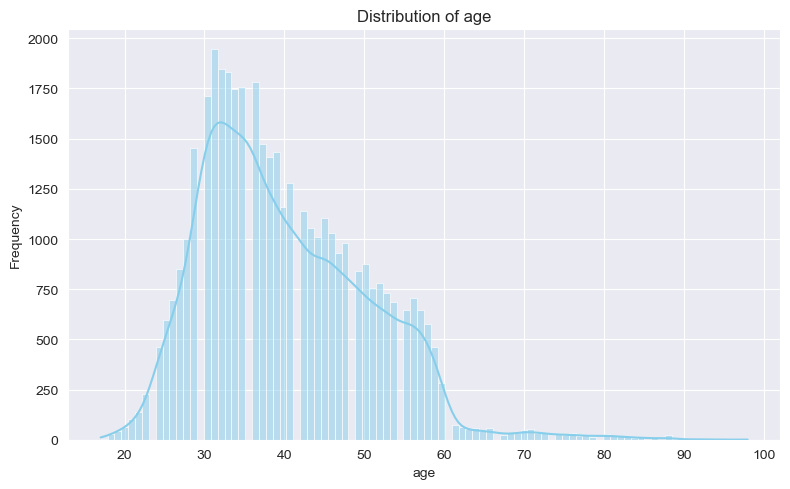

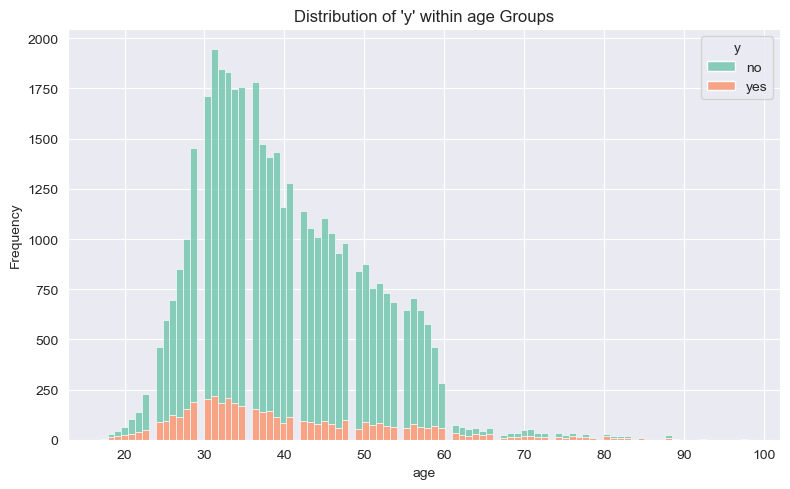

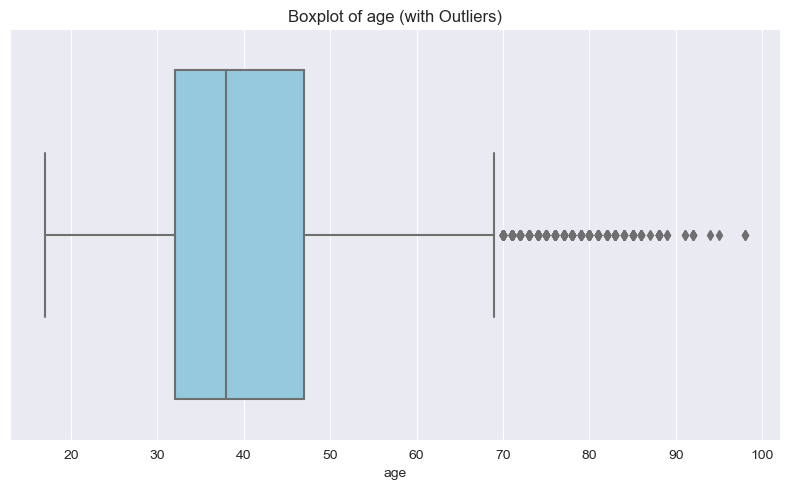

In [538]:
visualize_features(dataset_numerical,'age')
visualize_target_feature(dataset_numerical,y,'age')
visualize_outliers(dataset_numerical,'age')

In [539]:
remove_outliers_by_quantiles(dataset_numerical,'age')

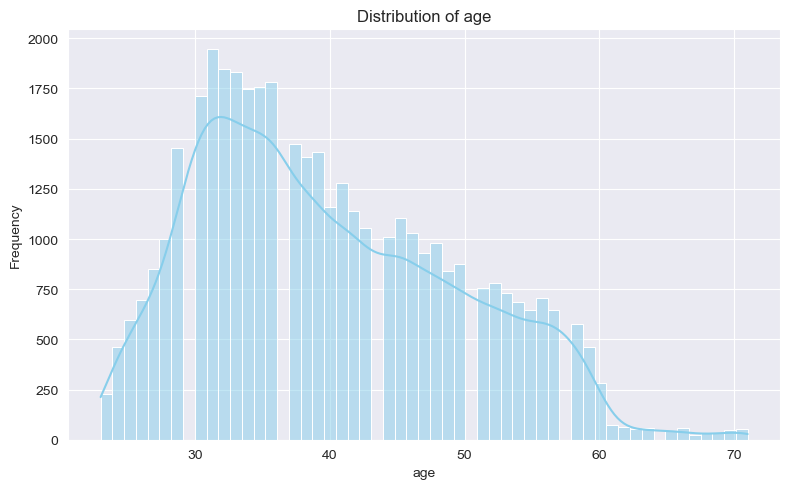

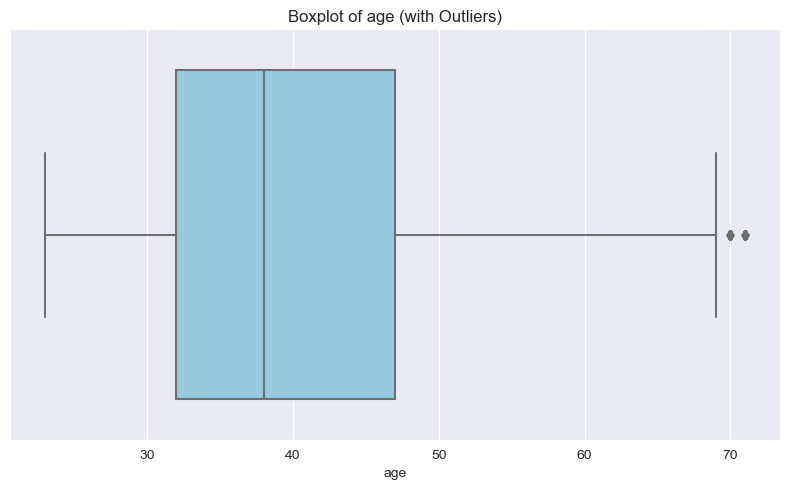

In [540]:
visualize_features(dataset_numerical,'age')
visualize_outliers(dataset_numerical,'age')

In [541]:
age_thresholds = [29,32,35,38,42,47,53]
print_extract_feature_by_thresholds(dataset_numerical,'age',age_thresholds)

Number of samples in specific age groups:
<29: 5290 samples, 13.08%
29-32: 5507 samples, 13.62%
32-35: 5337 samples, 13.20%
35-38: 4662 samples, 11.53%
38-42: 5013 samples, 12.40%
42-47: 5127 samples, 12.68%
47-53: 4959 samples, 12.26%
>53: 4545 samples, 11.24%


In [542]:
extract_feature_by_thresholds(dataset_numerical,'age',age_thresholds)

In [543]:
age_mapping = {
    'age_1': 'age_<=29',
    'age_2': 'age_(29,32]',
    'age_3': 'age_(32,35]',
    'age_4': 'age_(35,38]',
    'age_5': 'age_(38,42]',
    'age_6': 'age_(42,47]',
    'age_7': 'age_(47,53]',
    'age_8': 'age_>53'
}
dataset_numerical['age_group'] = dataset_numerical['age_group'].replace(age_mapping)

In [544]:
dataset_numerical['age_group'].value_counts()

age_group
age_(29,32]    5507
age_(32,35]    5337
age_<=29       5290
age_(42,47]    5127
age_(38,42]    5013
age_(47,53]    4959
age_(35,38]    4662
age_>53        4545
Name: count, dtype: int64

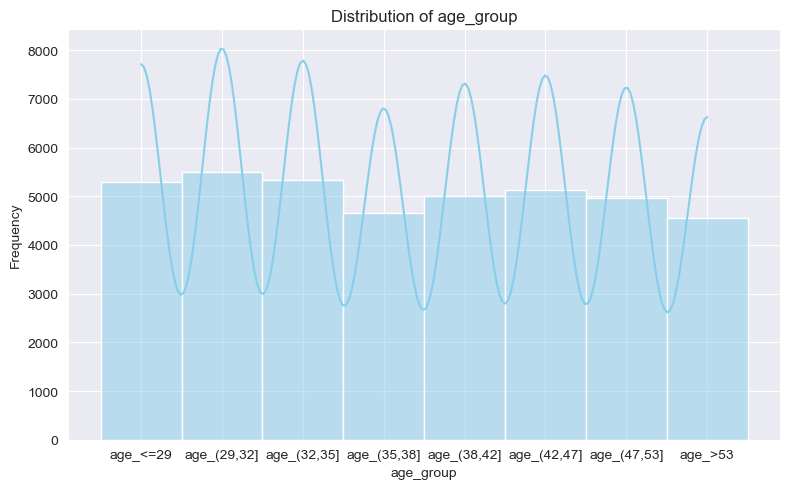

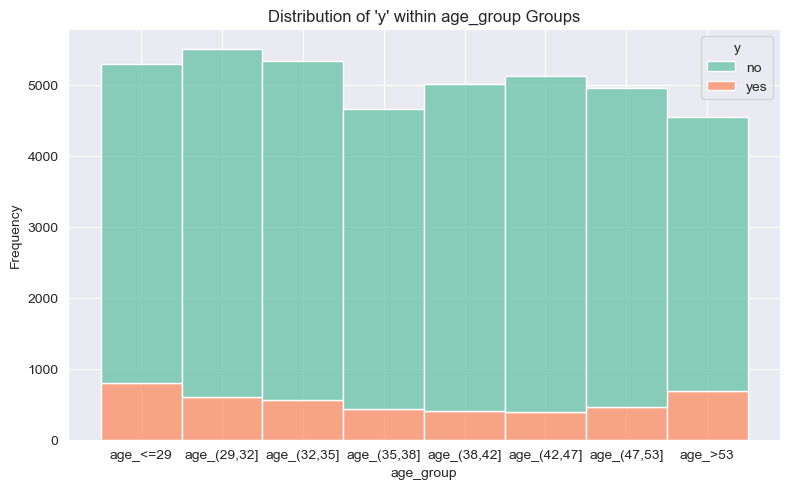

In [545]:
visualize_features(dataset_numerical,'age_group')
visualize_target_feature(dataset_numerical,y,'age_group')

##### 2-) Duration

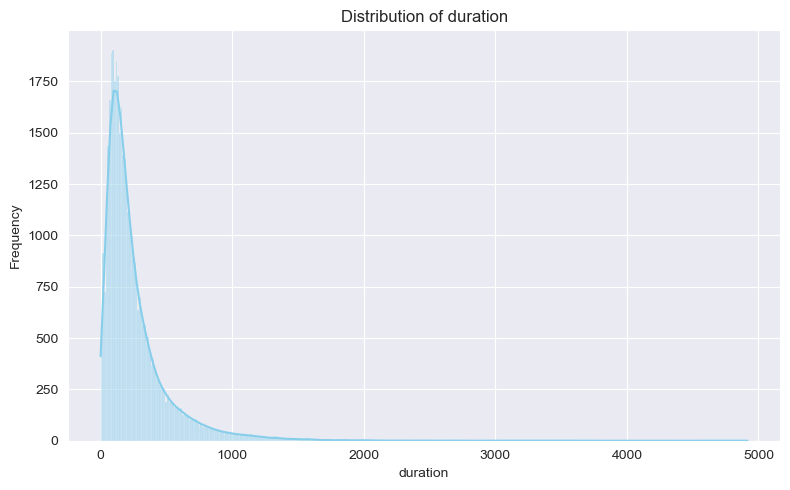

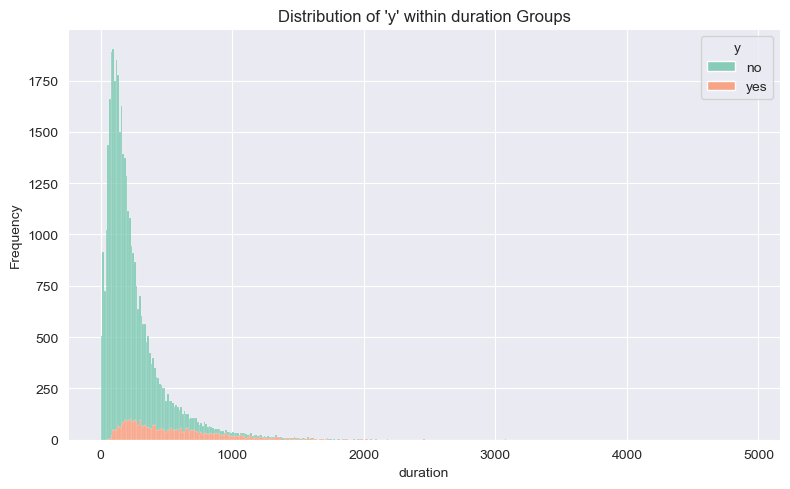

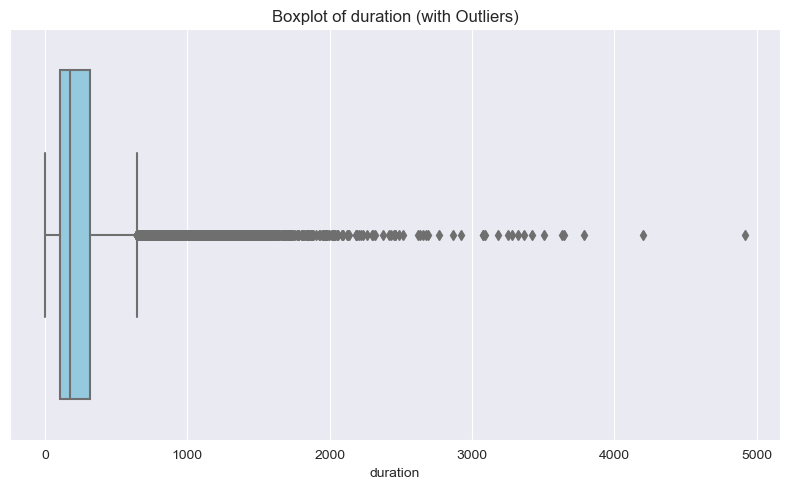

In [546]:
visualize_features(dataset_numerical,'duration')
visualize_target_feature(dataset_numerical,y,'duration')
visualize_outliers(dataset_numerical,'duration')

In [547]:
remove_outliers_by_quantiles(dataset_numerical,'duration')

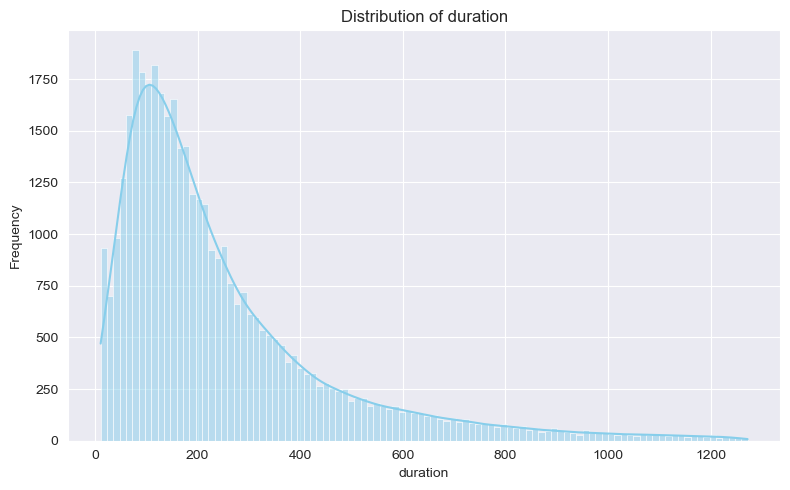

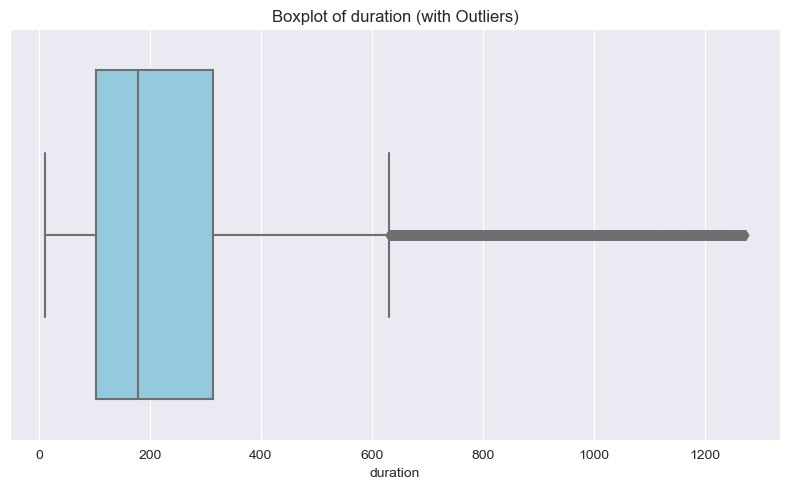

In [548]:
visualize_features(dataset_numerical,'duration')
visualize_outliers(dataset_numerical,'duration')

In [549]:
duration_threshold = [70,100,130,170,220,300,450]
print_extract_feature_by_thresholds(dataset_numerical,'duration',duration_threshold)

Number of samples in specific duration groups:
<70: 5155 samples, 12.99%
70-100: 4394 samples, 11.07%
100-130: 4304 samples, 10.85%
130-170: 5041 samples, 12.70%
170-220: 4963 samples, 12.51%
220-300: 5240 samples, 13.21%
300-450: 5170 samples, 13.03%
>450: 5411 samples, 13.64%


In [550]:
extract_feature_by_thresholds(dataset_numerical,'duration',duration_threshold)

In [551]:
age_mapping = {
    'duration_1': 'duration_<=70',
    'duration_2': 'duration_(70,100]',
    'duration_3': 'duration_(100,130]',
    'duration_4': 'duration_(130,170]',
    'duration_5': 'duration_(170,220]',
    'duration_6': 'duration_(220,300]',
    'duration_7': 'duration_(300,450]',
    'duration_8': 'duration_>450'
}
dataset_numerical['duration_group'] = dataset_numerical['duration_group'].replace(age_mapping)

In [552]:
dataset_numerical['duration_group'].value_counts()

duration_group
duration_>450         5411
duration_(220,300]    5240
duration_(300,450]    5170
duration_<=70         5155
duration_(130,170]    5041
duration_(170,220]    4963
duration_(70,100]     4394
duration_(100,130]    4304
Name: count, dtype: int64

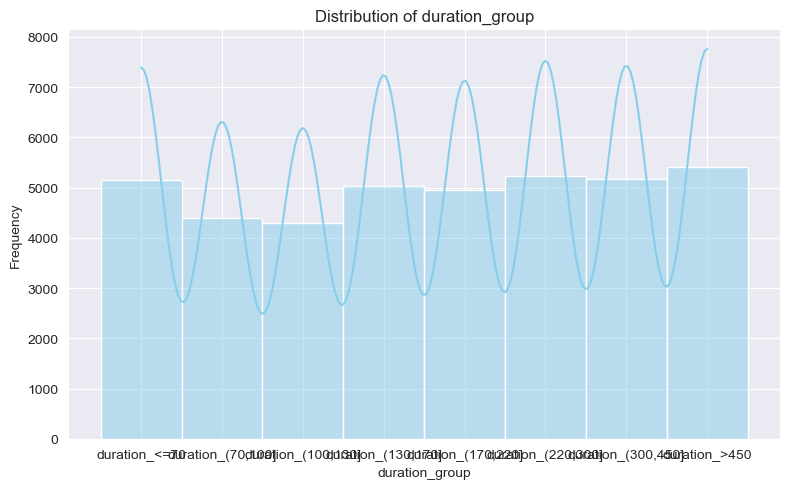

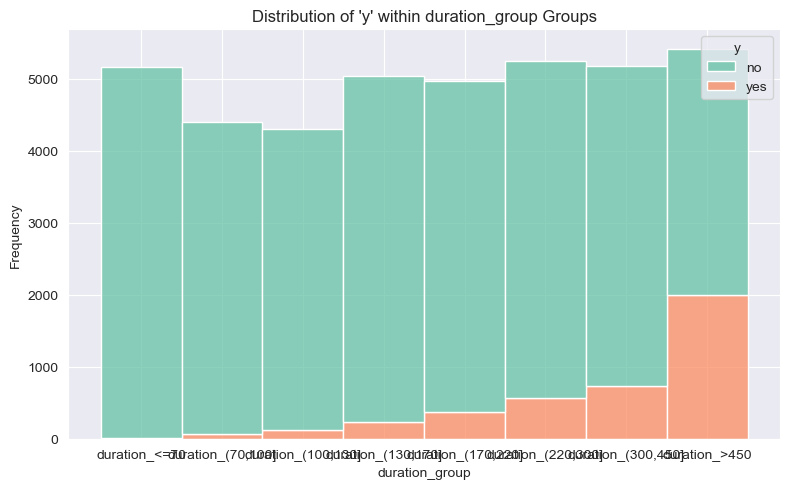

In [553]:
visualize_features(dataset_numerical,'duration_group')
visualize_target_feature(dataset_numerical,y,'duration_group')

##### 3-) Campaign

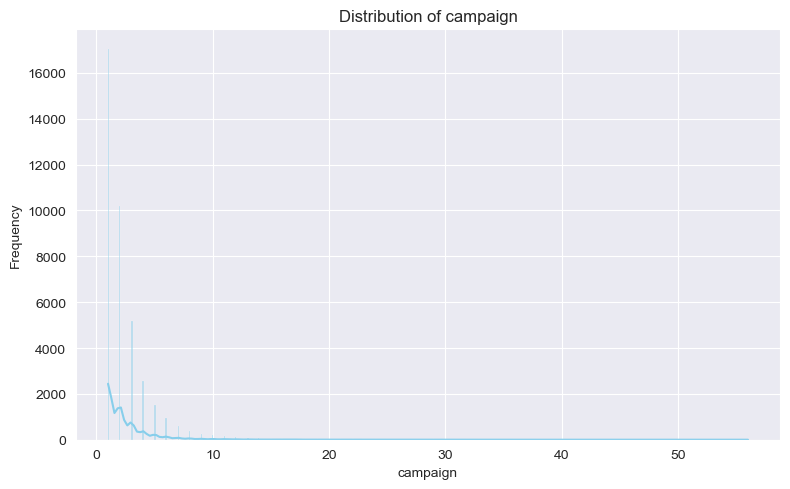

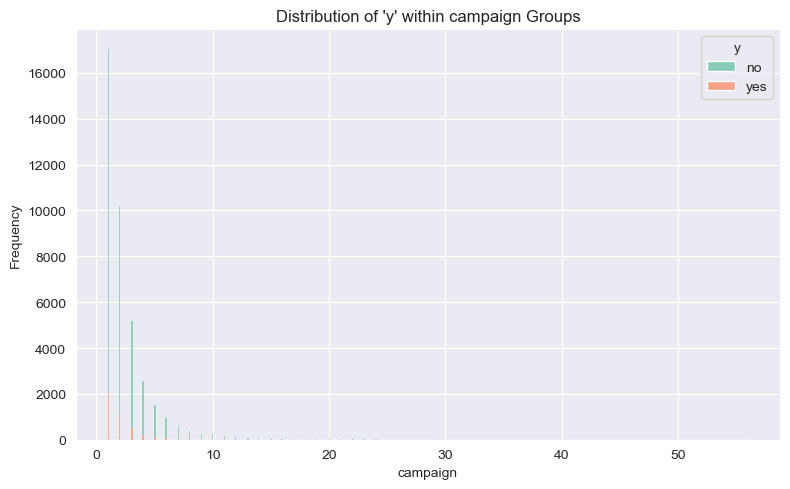

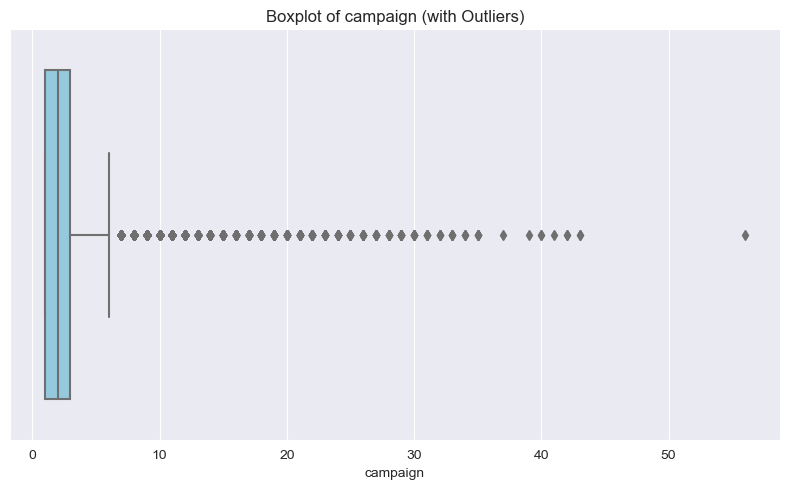

In [554]:
visualize_features(dataset_numerical,'campaign')
visualize_target_feature(dataset_numerical,y,'campaign')
visualize_outliers(dataset_numerical,'campaign')

In [555]:
remove_outliers_by_quantiles(dataset_numerical,'campaign')

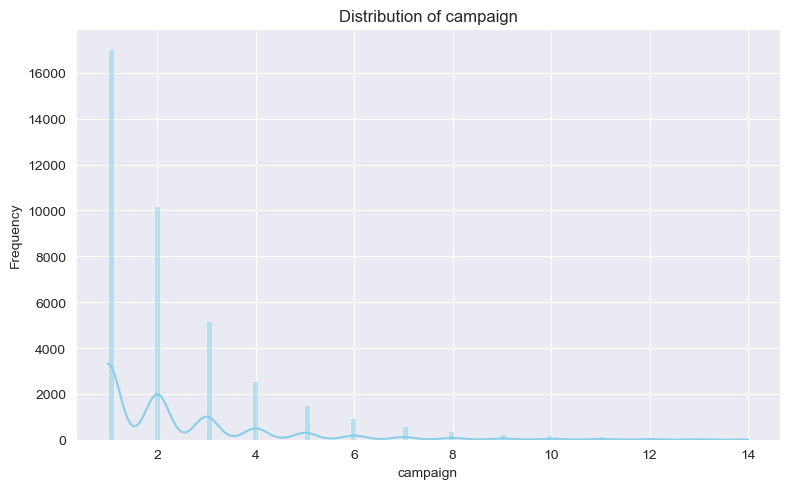

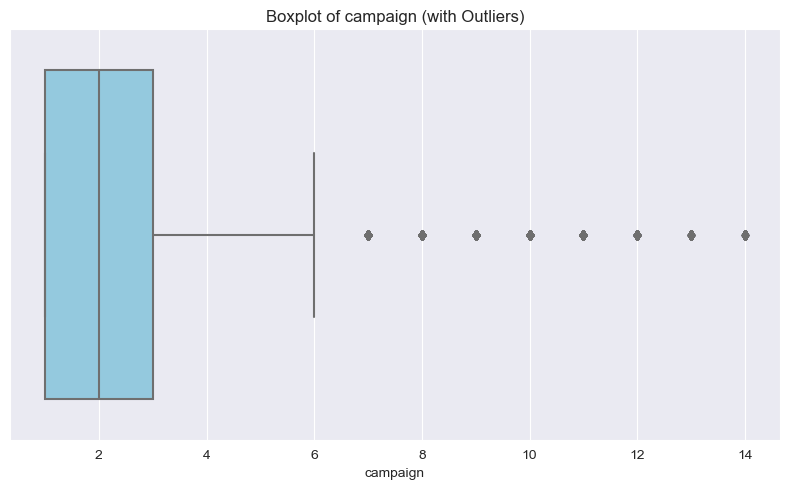

In [556]:
visualize_features(dataset_numerical,'campaign')
visualize_outliers(dataset_numerical,'campaign')

In [557]:
campaign_threshold = [1,2]
print_extract_feature_by_thresholds(dataset_numerical,'campaign',campaign_threshold)

Number of samples in specific campaign groups:
<1: 17044 samples, 43.36%
1-2: 10198 samples, 25.95%
>2: 12064 samples, 30.69%


In [558]:
extract_feature_by_thresholds(dataset_numerical,'campaign',campaign_threshold)

In [559]:
age_mapping = {
    'campaign_1': 'duration_<=1',
    'campaign_2': 'duration_(1,2]',
    'campaign_3': 'duration_>2',

}
dataset_numerical['campaign_group'] = dataset_numerical['campaign_group'].replace(age_mapping)

In [560]:
dataset_numerical['campaign_group'].value_counts()

campaign_group
duration_<=1      17044
duration_>2       12064
duration_(1,2]    10198
Name: count, dtype: int64

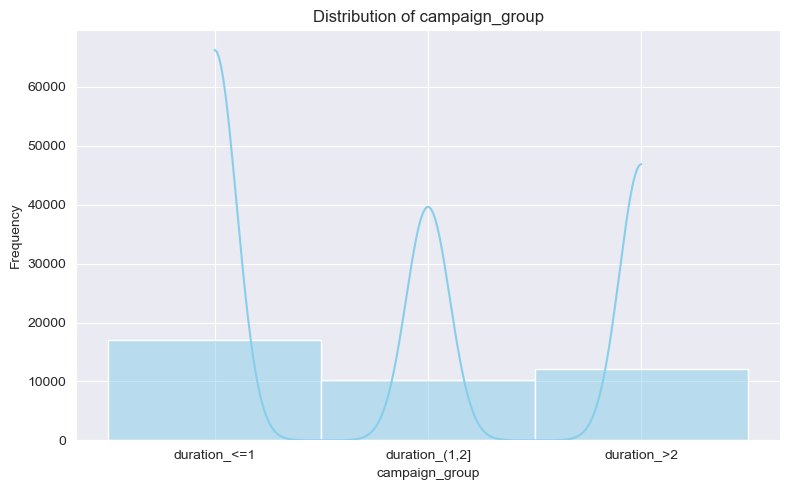

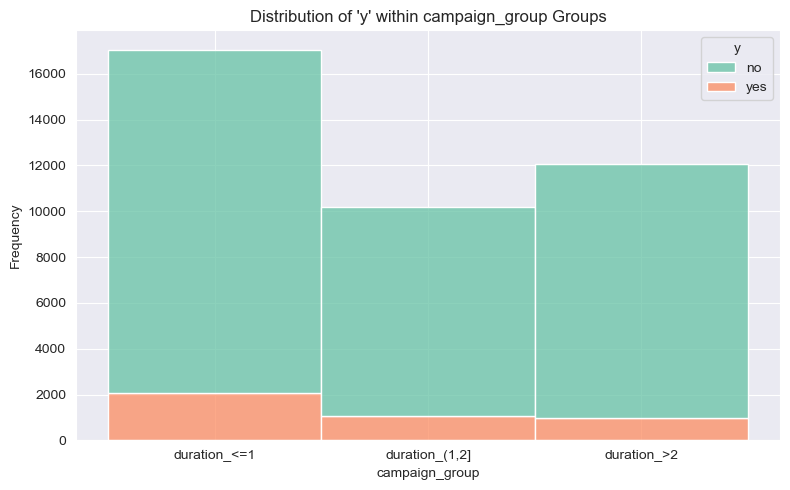

In [561]:
visualize_features(dataset_numerical,'campaign_group')
visualize_target_feature(dataset_numerical,y,'campaign_group')

##### 4-) pdays

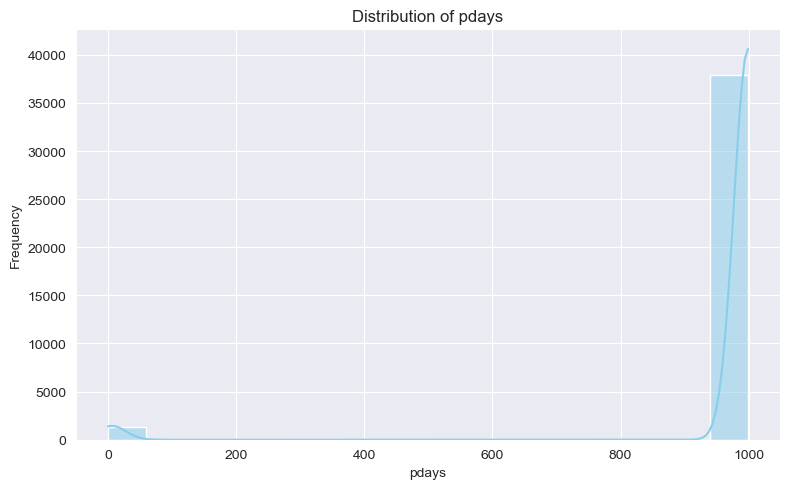

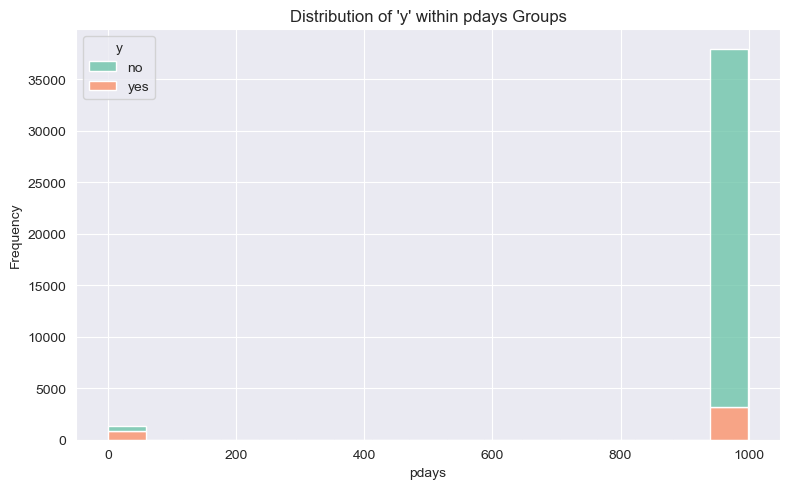

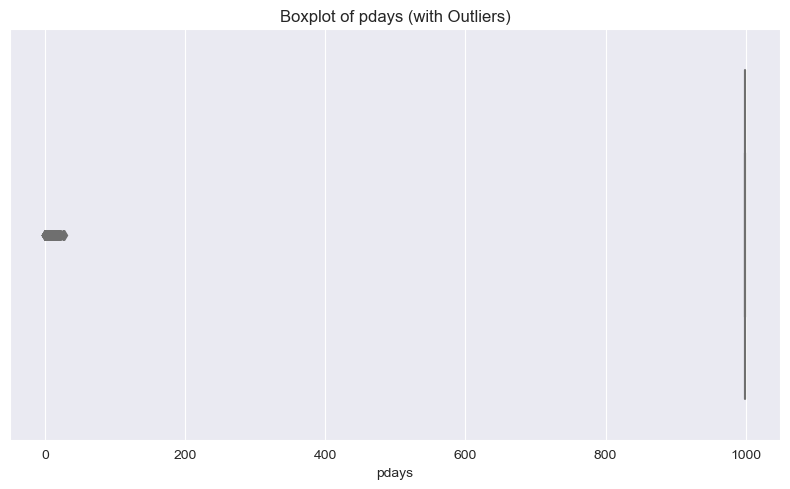

In [562]:
visualize_features(dataset_numerical,'pdays')
visualize_target_feature(dataset_numerical,y,'pdays')
visualize_outliers(dataset_numerical,'pdays')

In [563]:
remove_outliers_by_quantiles(dataset_numerical,'pdays')

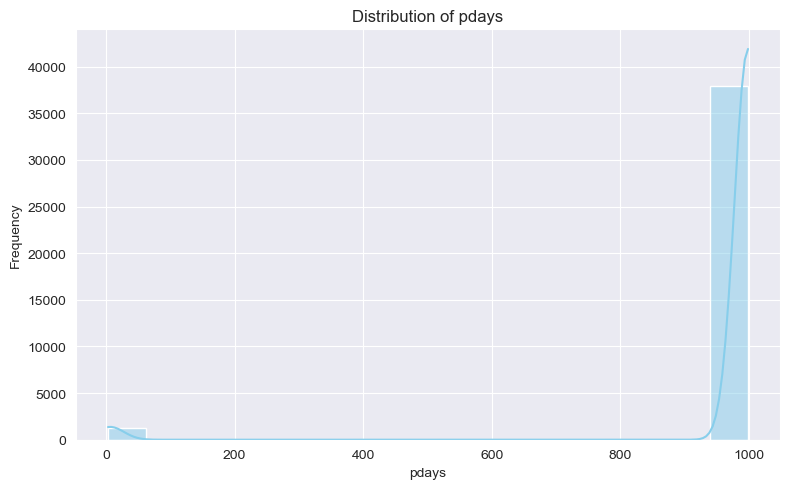

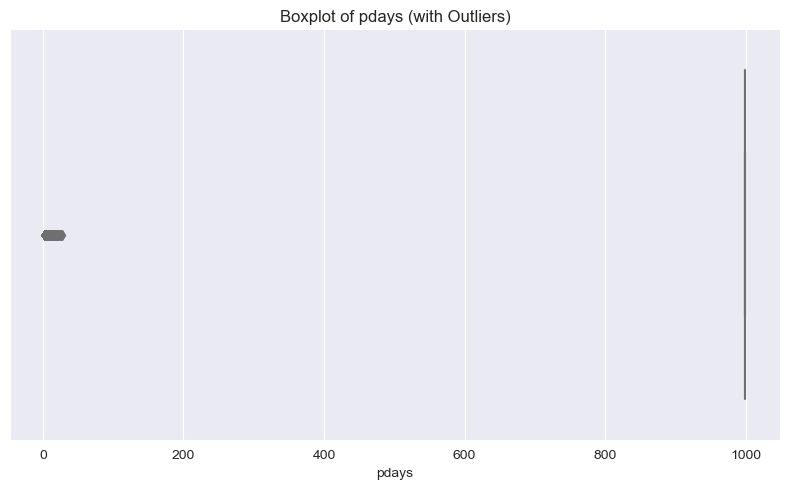

In [564]:
visualize_features(dataset_numerical,'pdays')
visualize_outliers(dataset_numerical,'pdays')

In [565]:
pdays_threshold = [100,1000]
print_extract_feature_by_thresholds(dataset_numerical,'pdays',pdays_threshold)

Number of samples in specific pdays groups:
<100: 1267 samples, 3.23%
100-1000: 37942 samples, 96.77%
>1000: 0 samples, 0.00%


In [566]:
dataset_numerical.loc[dataset_numerical['pdays'] <= 100, 'pdays'] = 0
dataset_numerical.loc[dataset_numerical['pdays'] > 100, 'pdays'] = 1

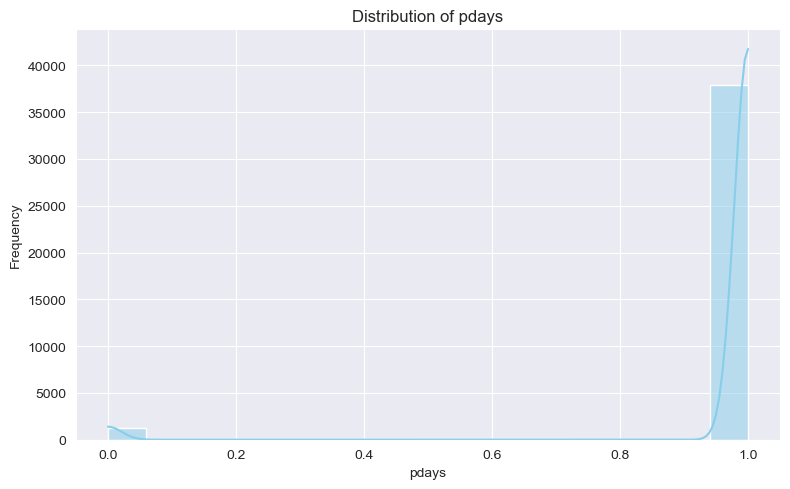

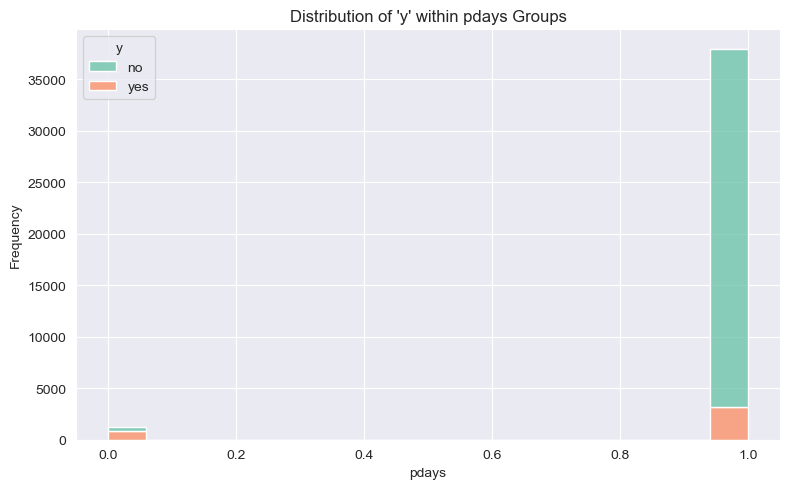

In [567]:
visualize_features(dataset_numerical,'pdays')
visualize_target_feature(dataset_numerical,y,'pdays')

##### 5-) previous

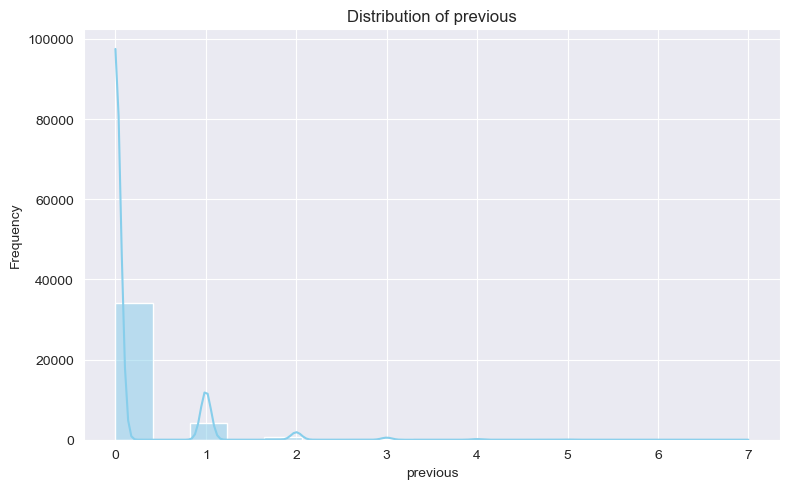

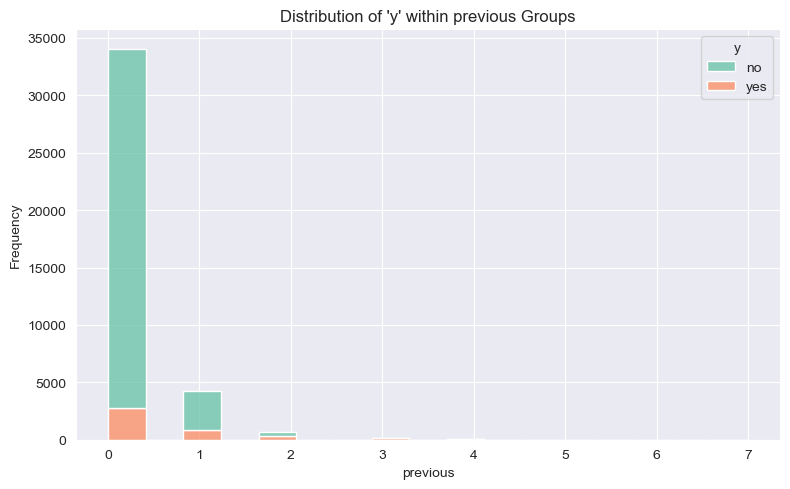

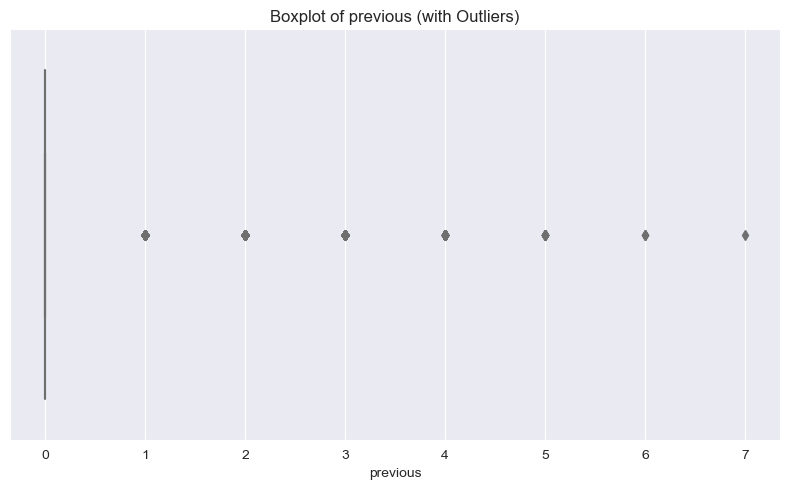

In [568]:
visualize_features(dataset_numerical,'previous')
visualize_target_feature(dataset_numerical,y,'previous')
visualize_outliers(dataset_numerical,'previous')

In [569]:
remove_outliers_by_quantiles(dataset_numerical,'previous')

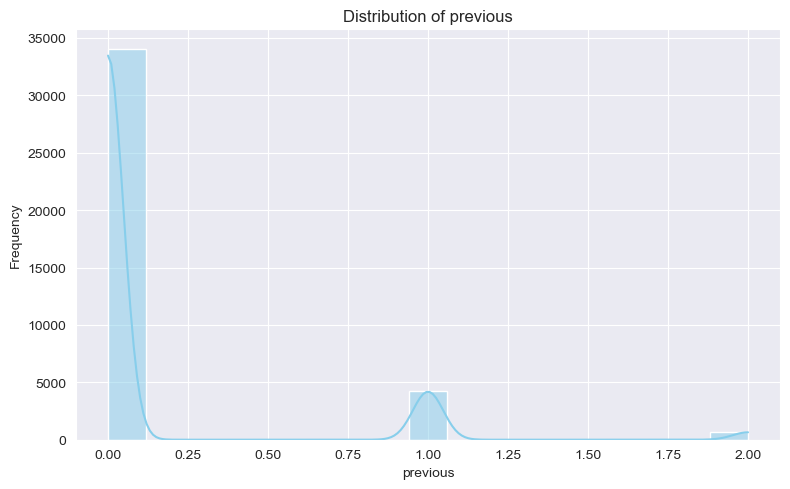

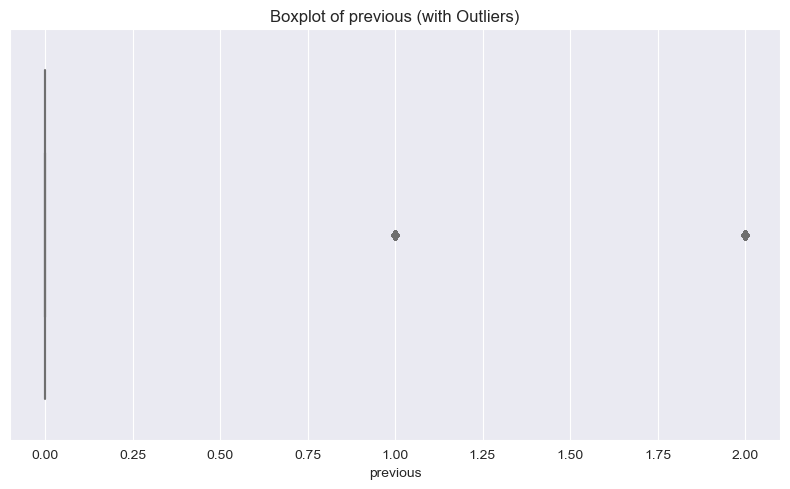

In [570]:
visualize_features(dataset_numerical,'previous')
visualize_outliers(dataset_numerical,'previous')

In [571]:
previous_threshold = [0,1]
print_extract_feature_by_thresholds(dataset_numerical,'previous',previous_threshold)

Number of samples in specific previous groups:
<0: 34041 samples, 87.39%
0-1: 4255 samples, 10.92%
>1: 658 samples, 1.69%


In [572]:
dataset_numerical['previous'].value_counts()

previous
0    34041
1     4255
2      658
Name: count, dtype: int64

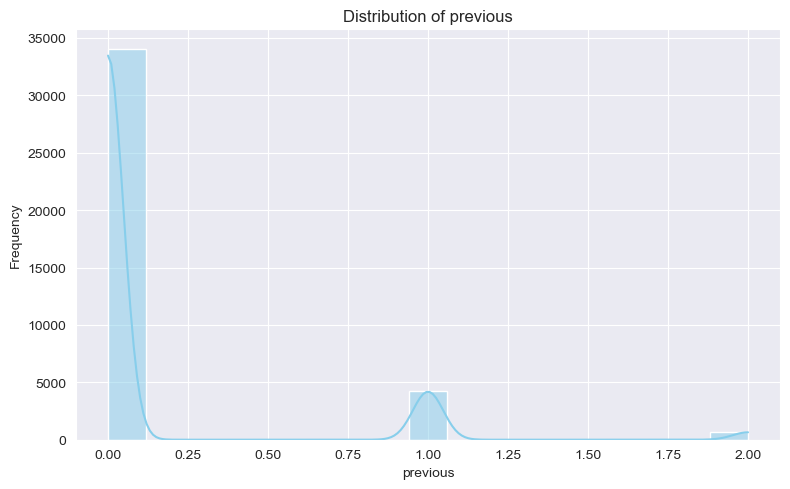

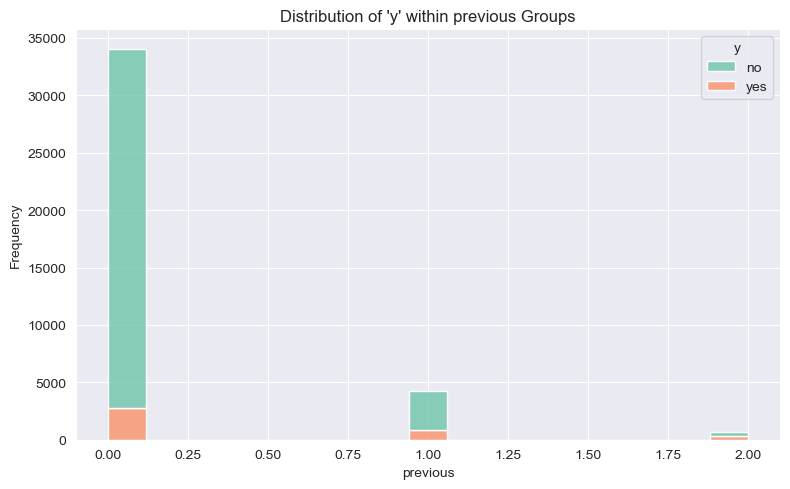

In [573]:
visualize_features(dataset_numerical,'previous')
visualize_target_feature(dataset_numerical,y,'previous')

##### 6-) emp.var.rate

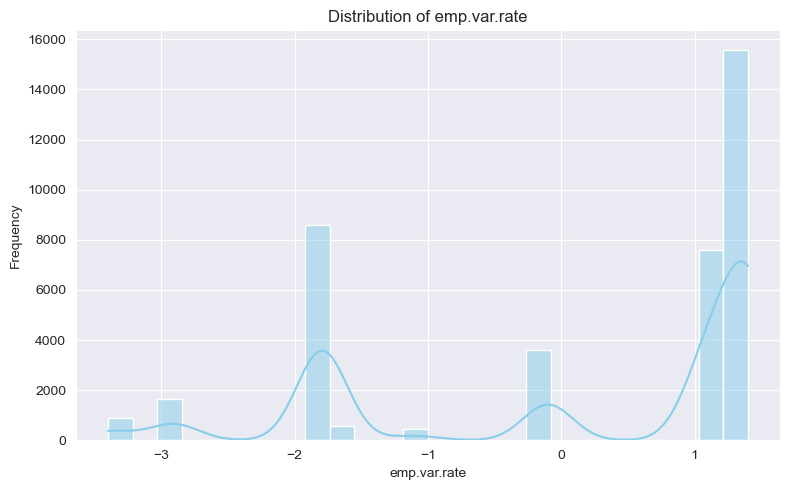

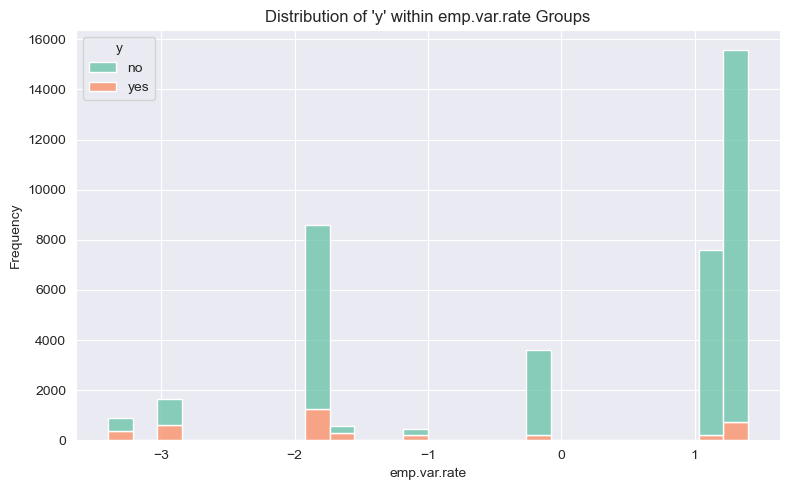

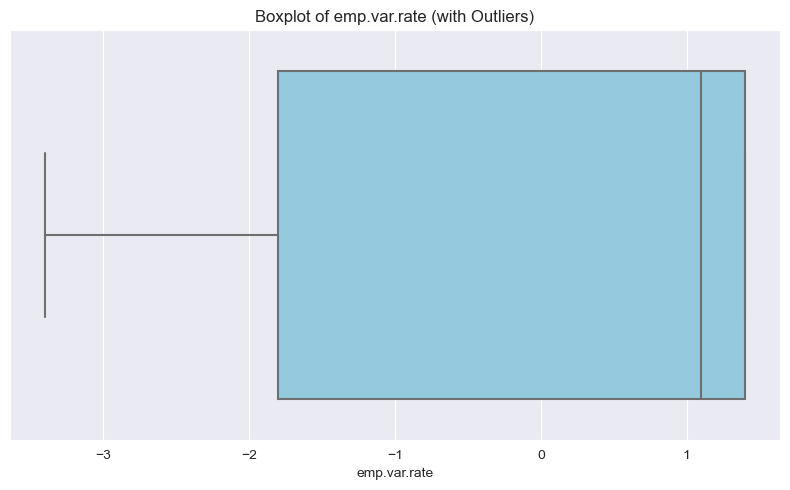

In [574]:
visualize_features(dataset_numerical,'emp.var.rate')
visualize_target_feature(dataset_numerical,y,'emp.var.rate')
visualize_outliers(dataset_numerical,'emp.var.rate')

In [575]:
dataset_numerical['emp.var.rate'].value_counts()

emp.var.rate
 1.4    15577
-1.8     8608
 1.1     7594
-0.1     3610
-2.9     1516
-3.4      898
-1.7      556
-1.1      443
-3.0      142
-0.2       10
Name: count, dtype: int64

In [576]:
emp_rate_threshold = [0]
print_extract_feature_by_thresholds(dataset_numerical,'emp.var.rate',emp_rate_threshold)

Number of samples in specific emp.var.rate groups:
<0: 15783 samples, 40.52%
>0: 23171 samples, 59.48%


In [577]:
dataset_numerical['emp.var.rate_group'] = dataset_numerical['emp.var.rate']
dataset_numerical.loc[dataset_numerical['emp.var.rate'] < 0, 'emp.var.rate_group'] = 0
dataset_numerical.loc[dataset_numerical['emp.var.rate'] > 0, 'emp.var.rate_group'] = 1

In [578]:
dataset_numerical['emp.var.rate_group'].value_counts()

emp.var.rate_group
1.0    23171
0.0    15783
Name: count, dtype: int64

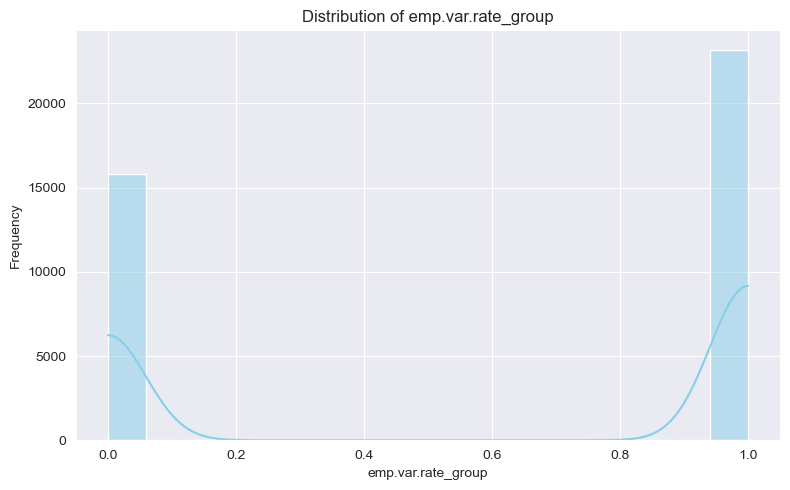

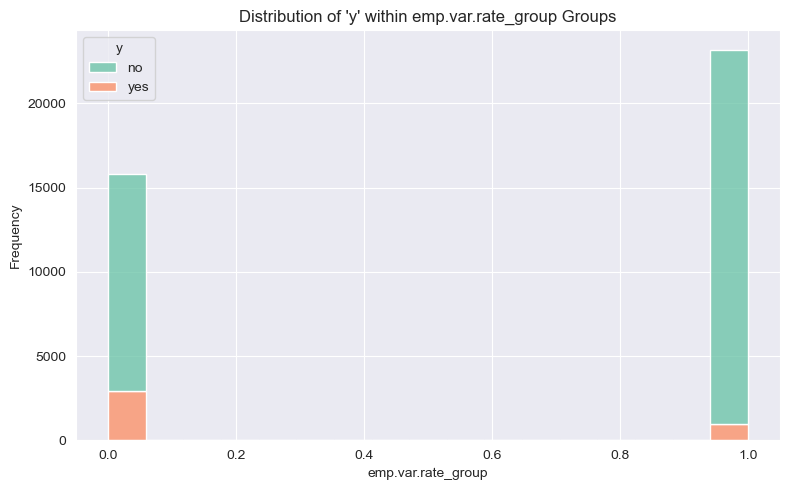

In [579]:
visualize_features(dataset_numerical,'emp.var.rate_group')
visualize_target_feature(dataset_numerical,y,'emp.var.rate_group')

##### 7-) cons.price.idx

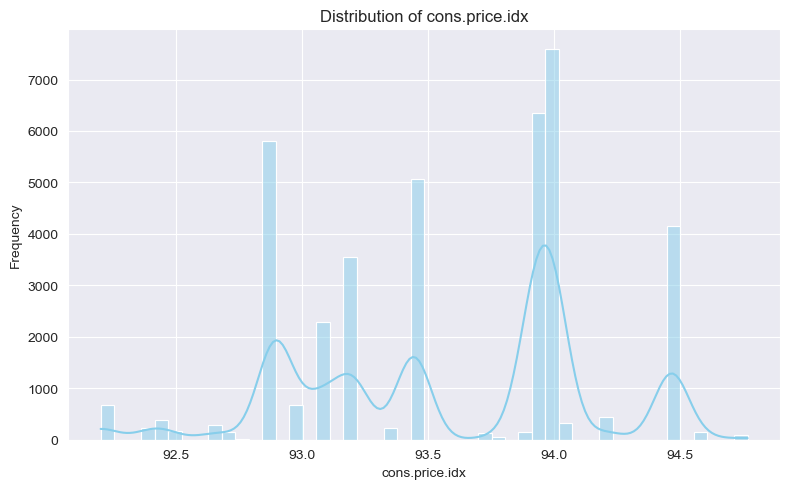

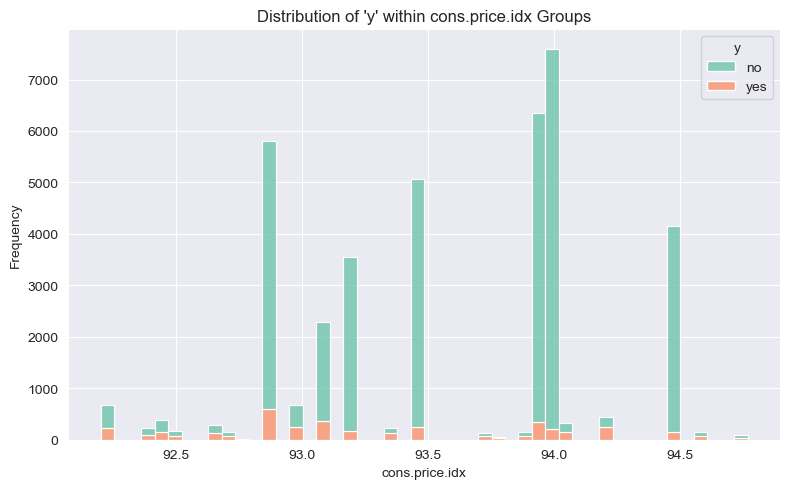

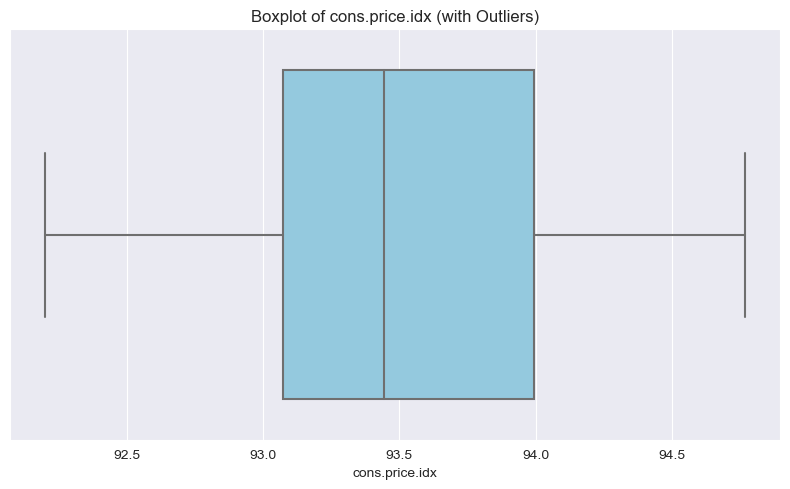

In [580]:
visualize_features(dataset_numerical,'cons.price.idx')
visualize_target_feature(dataset_numerical,y,'cons.price.idx')
visualize_outliers(dataset_numerical,'cons.price.idx')

In [581]:
dataset_numerical['cons.price.idx'].value_counts()

cons.price.idx
93.994    7594
93.918    6355
92.893    5567
93.444    5072
94.465    4150
93.200    3550
93.075    2289
92.963     674
92.201     669
92.431     375
92.649     291
92.843     247
94.215     237
92.379     232
93.369     228
94.199     204
92.469     173
94.055     172
94.027     147
94.601     146
92.713     142
93.876     141
93.749     136
94.767      93
93.798      60
92.756      10
Name: count, dtype: int64

In [582]:
cons_price_idx_threshold = [92,93,94]
print_extract_feature_by_thresholds(dataset_numerical,'cons.price.idx',cons_price_idx_threshold)

Number of samples in specific cons.price.idx groups:
<92: 0 samples, 0.00%
92-93: 8380 samples, 21.51%
93-94: 25425 samples, 65.27%
>94: 5149 samples, 13.22%


In [583]:
dataset_numerical['cons.price.idx_group'] = dataset_numerical['cons.price.idx']
dataset_numerical.loc[dataset_numerical['cons.price.idx'] <= 93.0, 'cons.price.idx_group'] = 2
dataset_numerical.loc[(dataset_numerical['cons.price.idx'] >= 93.0) & (dataset_numerical['cons.price.idx'] < 94.0), 'cons.price.idx_group'] = 3
dataset_numerical.loc[dataset_numerical['cons.price.idx'] >= 94.0, 'cons.price.idx_group'] = 4

In [584]:
dataset_numerical['cons.price.idx_group'].value_counts()

cons.price.idx_group
3.0    25425
2.0     8380
4.0     5149
Name: count, dtype: int64

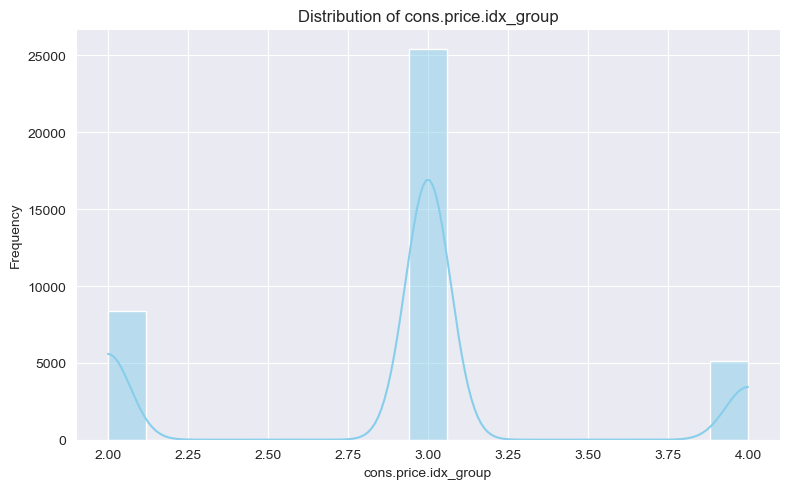

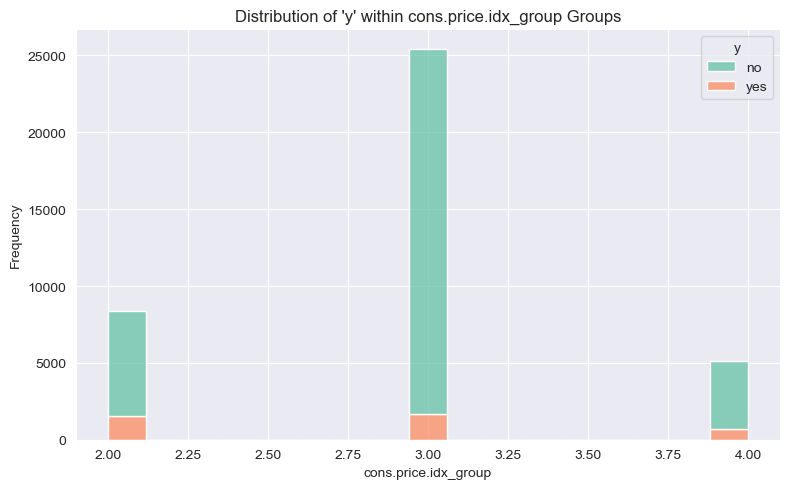

In [585]:
visualize_features(dataset_numerical,'cons.price.idx_group')
visualize_target_feature(dataset_numerical,y,'cons.price.idx_group')

##### 8-) cons.conf.idx

In [586]:
remove_outliers_by_quantiles(dataset_numerical,'cons.conf.idx')

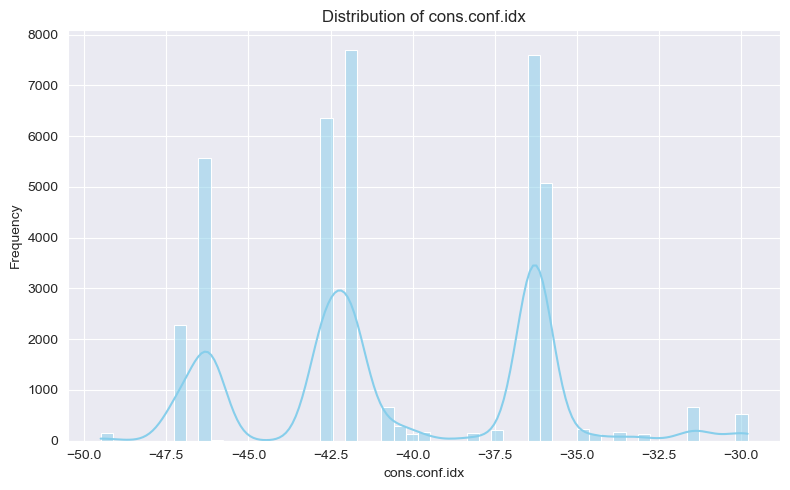

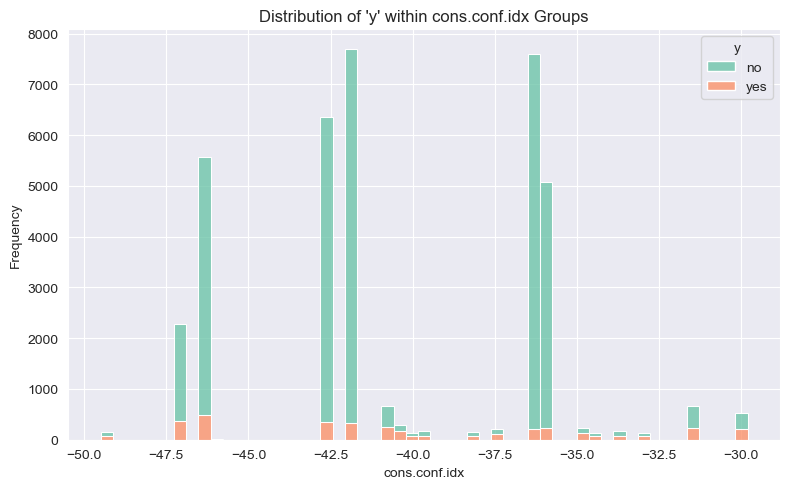

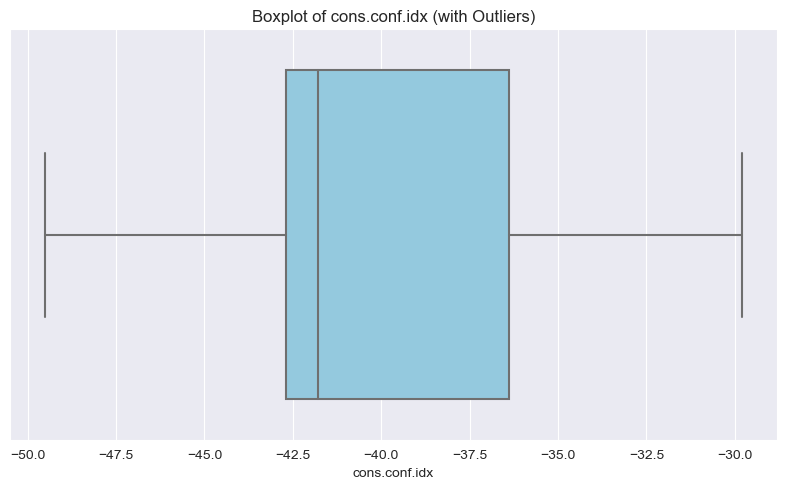

In [587]:
visualize_features(dataset_numerical,'cons.conf.idx')
visualize_target_feature(dataset_numerical,y,'cons.conf.idx')
visualize_outliers(dataset_numerical,'cons.conf.idx')

In [588]:
cons_conf_idx_threshold = [-45,-40]
print_extract_feature_by_thresholds(dataset_numerical,'cons.conf.idx',cons_conf_idx_threshold)

Number of samples in specific cons.conf.idx groups:
<-45: 8012 samples, 20.95%
-45--40: 15167 samples, 39.66%
>-40: 15060 samples, 39.38%


In [589]:
dataset_numerical['cons.conf.idx_group'] = dataset_numerical['cons.conf.idx']
dataset_numerical.loc[dataset_numerical['cons.conf.idx'] <= -45.0, 'cons.conf.idx_group'] = 0
dataset_numerical.loc[(dataset_numerical['cons.conf.idx'] > -45.0) & (dataset_numerical['cons.conf.idx'] <= -40.0), 'cons.conf.idx_group'] = 1
dataset_numerical.loc[dataset_numerical['cons.conf.idx'] > -40.0, 'cons.conf.idx_group'] = 2

In [590]:
dataset_numerical['cons.conf.idx_group'].value_counts()

cons.conf.idx_group
1.0    15167
2.0    15060
0.0     8012
Name: count, dtype: int64

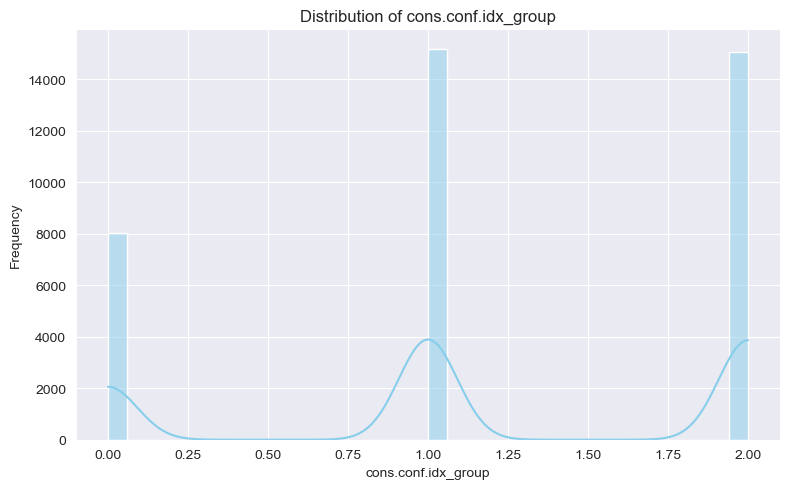

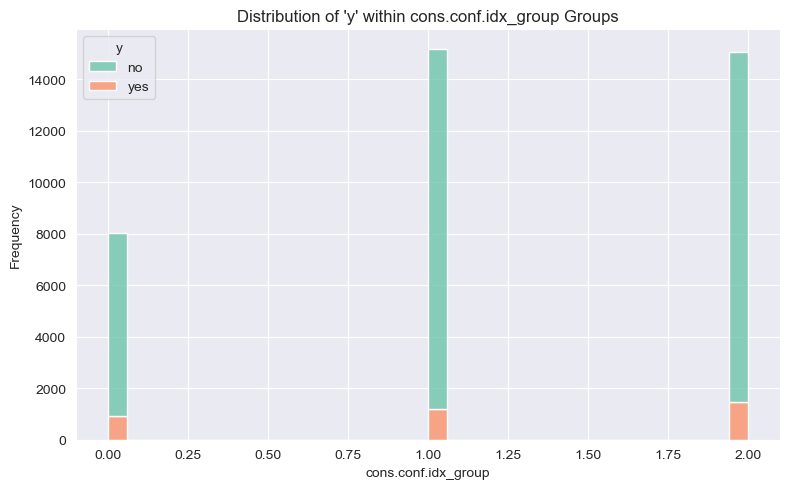

In [591]:
visualize_features(dataset_numerical,'cons.conf.idx_group')
visualize_target_feature(dataset_numerical,y,'cons.conf.idx_group')

In [592]:
dataset_numerical.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'age_group', 'duration_group', 'campaign_group', 'emp.var.rate_group',
       'cons.price.idx_group', 'cons.conf.idx_group'],
      dtype='object')

##### 9-) euribor3m

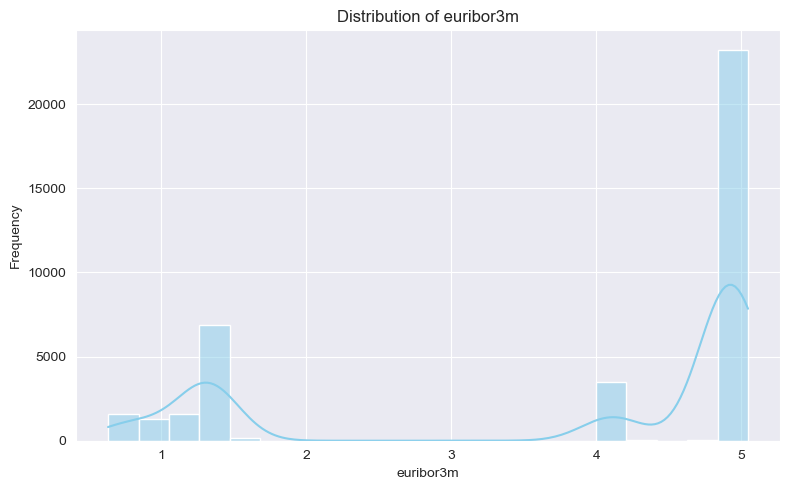

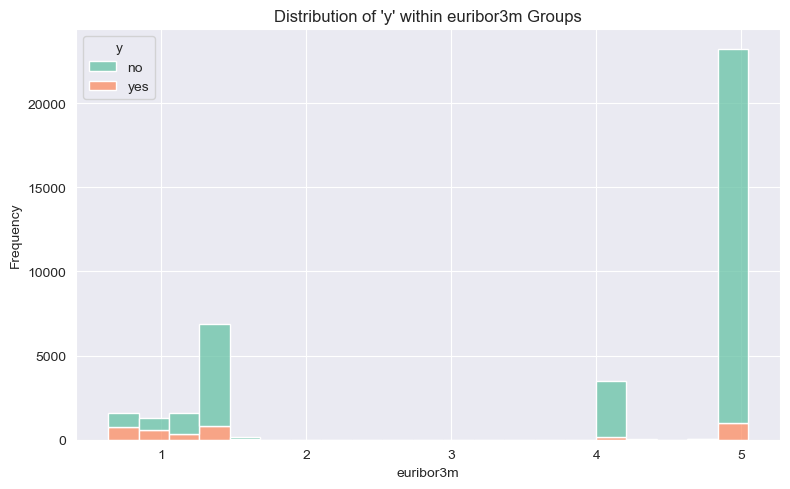

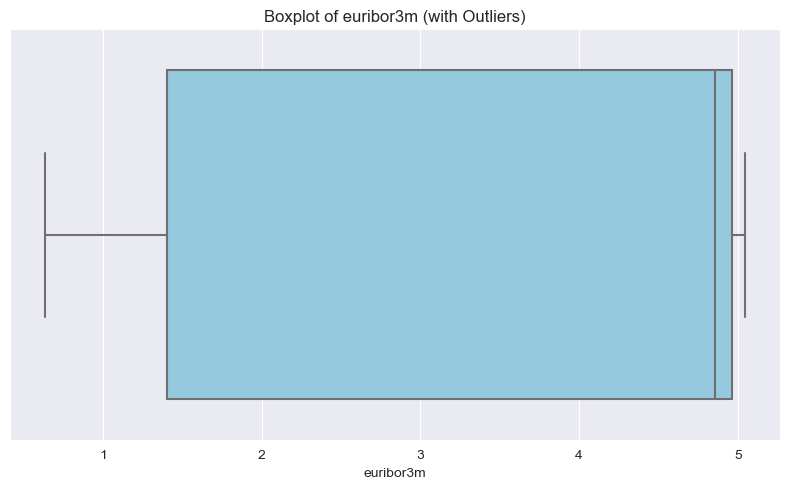

In [593]:
visualize_features(dataset_numerical,'euribor3m')
visualize_target_feature(dataset_numerical,y,'euribor3m')
visualize_outliers(dataset_numerical,'euribor3m')

In [594]:
remove_outliers_by_quantiles(dataset_numerical,'euribor3m')

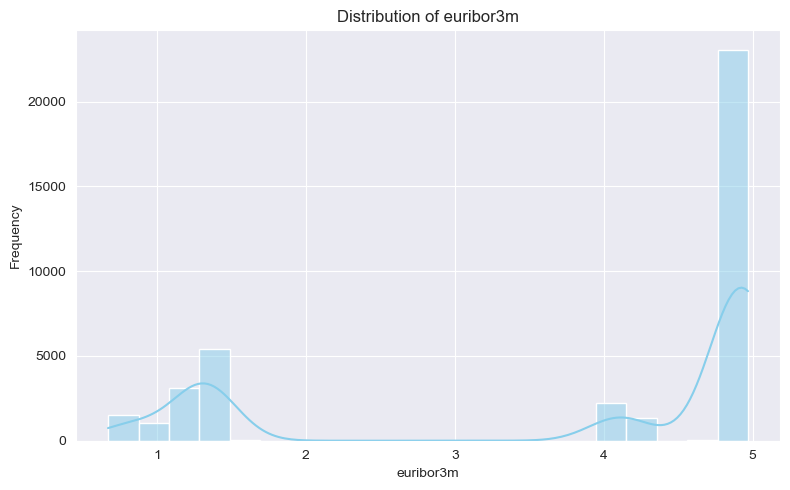

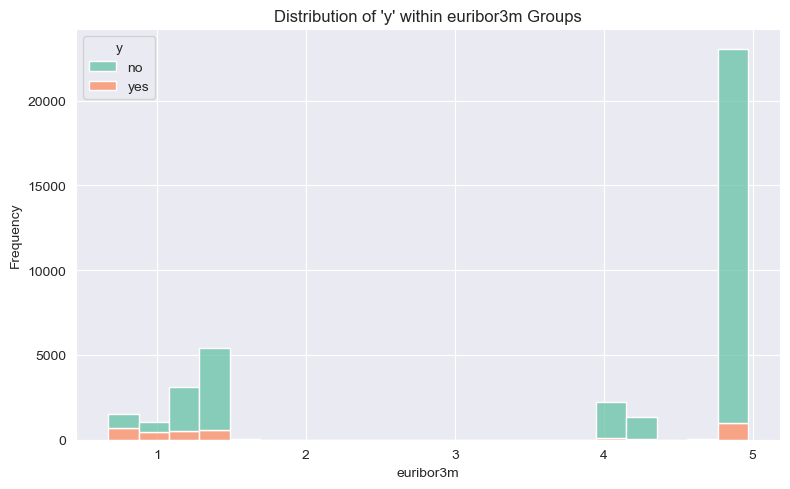

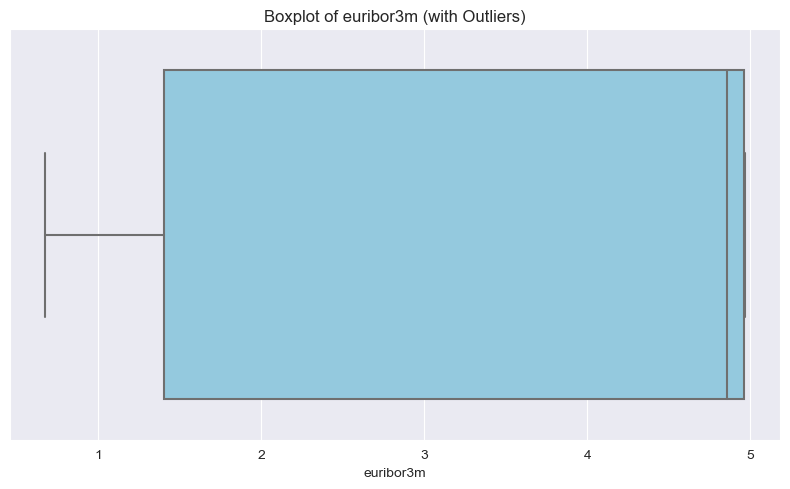

In [595]:
visualize_features(dataset_numerical,'euribor3m')
visualize_target_feature(dataset_numerical,y,'euribor3m')
visualize_outliers(dataset_numerical,'euribor3m')

##### 10-) nr.employed

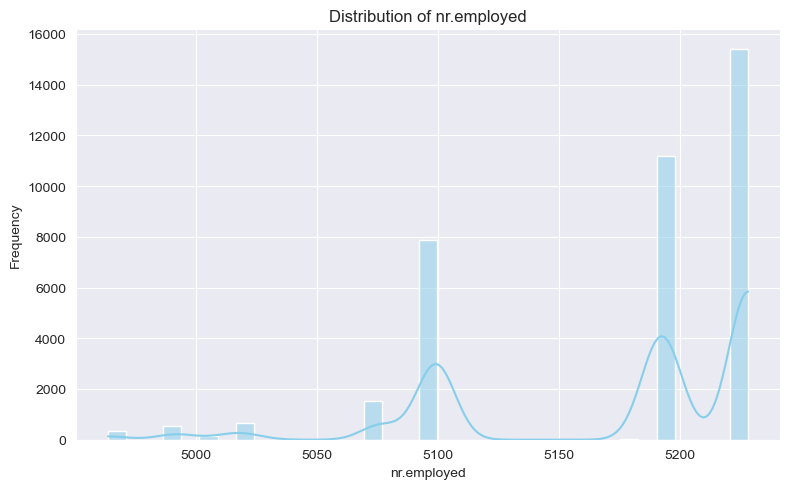

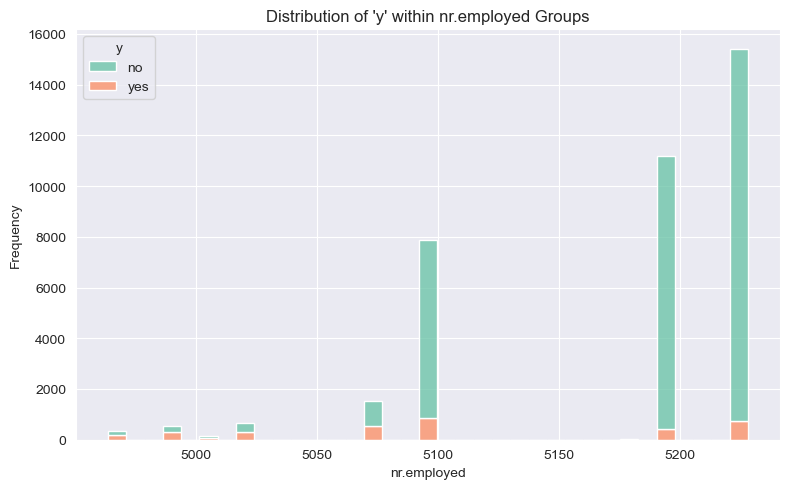

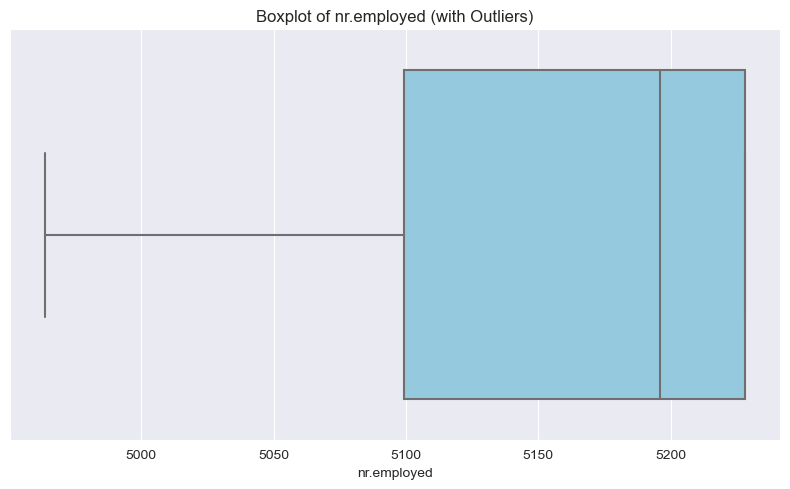

In [596]:
visualize_features(dataset_numerical,'nr.employed')
visualize_target_feature(dataset_numerical,y,'nr.employed')
visualize_outliers(dataset_numerical,'nr.employed')

In [597]:
remove_outliers_by_quantiles(dataset_numerical,'nr.employed')

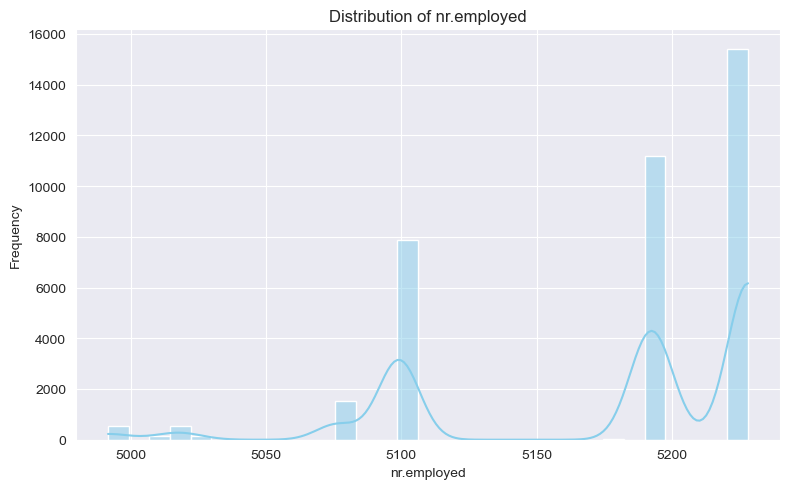

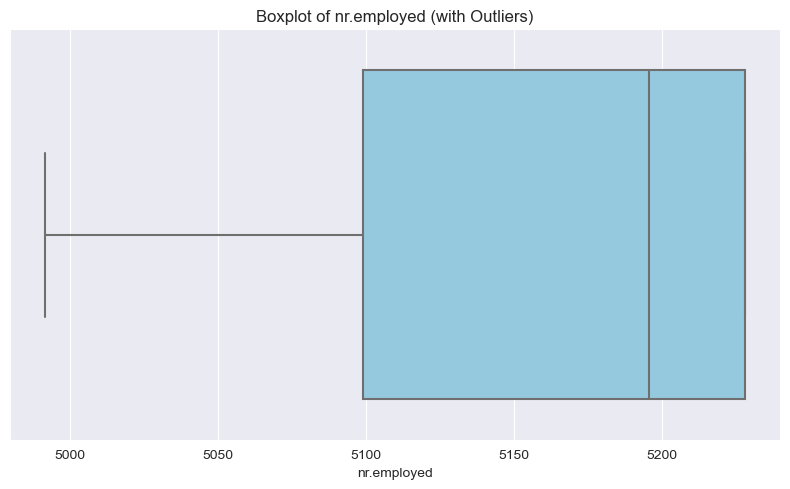

In [598]:
visualize_features(dataset_numerical,'nr.employed')
visualize_outliers(dataset_numerical,'nr.employed')

In [601]:
nr_employed_threshold = [5100,5200]
print_extract_feature_by_thresholds(dataset_numerical,'nr.employed',nr_employed_threshold)

Number of samples in specific nr.employed groups:
<5100: 10723 samples, 28.72%
5100-5200: 11201 samples, 30.01%
>5200: 15406 samples, 41.27%


In [602]:
extract_feature_by_thresholds(dataset_numerical,'nr.employed',nr_employed_threshold)

In [603]:
dataset_numerical['nr.employed_group'].value_counts()

nr.employed_group
nr.employed_3    15406
nr.employed_2    11201
nr.employed_1    10723
Name: count, dtype: int64

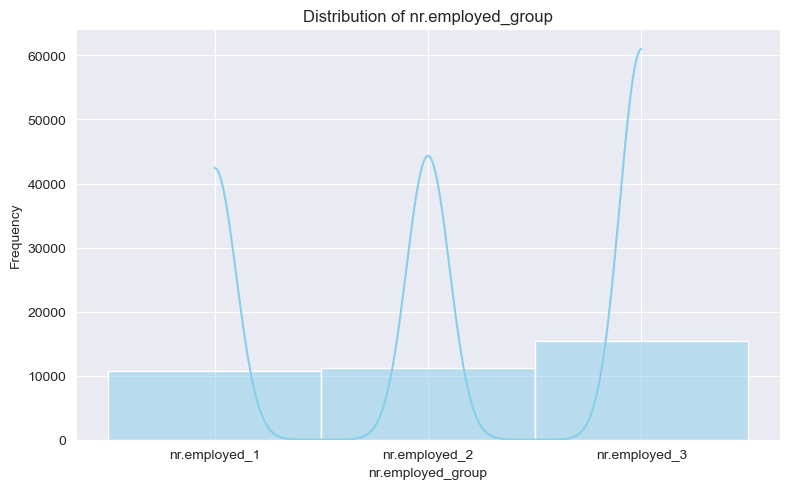

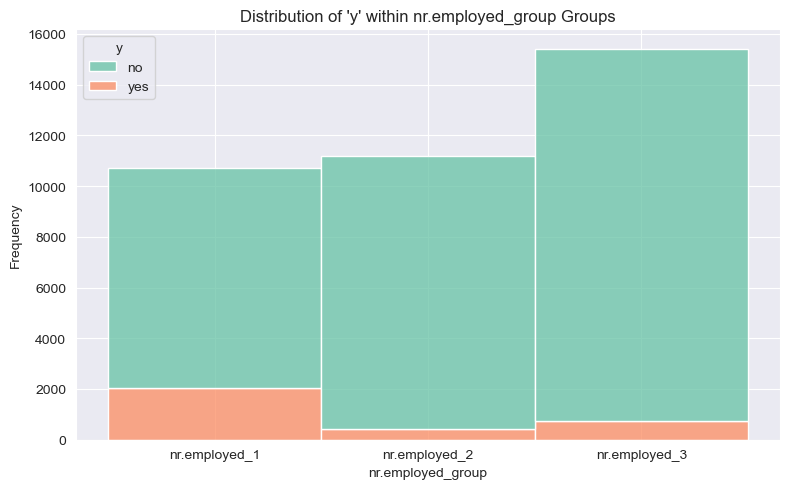

In [605]:
visualize_features(dataset_numerical,'nr.employed_group')
visualize_target_feature(dataset_numerical,y,'nr.employed_group')